# Baseball Player Metrics Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("500hits.csv", encoding="latin-1")

In [4]:
dataset.head()

,PLAYER,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,BA,HOF
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,178,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,31,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,129,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,97,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,0,963,327,722,15,0.329,1


In [6]:
dataset.isnull().sum().sum()

0

In [8]:
dataset = dataset.drop(columns= ["PLAYER","CS"])

In [9]:
dataset.head()

,YRS,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,BA,HOF
0,24,3035,11434,2246,4189,724,295,117,726,1249,357,892,0.366,1
1,22,3026,10972,1949,3630,725,177,475,1951,1599,696,78,0.331,1
2,22,2789,10195,1882,3514,792,222,117,724,1381,220,432,0.345,1
3,20,2747,11195,1923,3465,544,66,260,1311,1082,1840,358,0.310,1
4,21,2792,10430,1736,3430,640,252,101,0,963,327,722,0.329,1


In [11]:
x = dataset.iloc[:,:-1]
y = dataset["HOF"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [15]:
x_train.shape, y_train.shape

((372, 13), (372,))

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtc = DecisionTreeClassifier(max_depth=10)

In [71]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [72]:
dtc.score(x_test,y_test)*100, dtc.score(x_train,y_train)

(82.79569892473118, 0.9919354838709677)

In [73]:
y_pred = dtc.predict(x_test)

In [74]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [75]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[54,  8],
       [ 8, 23]], dtype=int64)

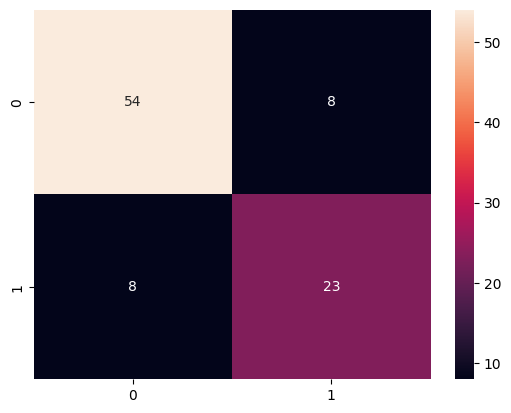

In [76]:
sns.heatmap(cf, annot=True)
plt.show()

In [77]:
recall_score(y_test, y_pred)*100

74.19354838709677

In [78]:
precision_score(y_test, y_pred)*100

74.19354838709677

In [79]:
f1_score(y_test, y_pred)*100

74.19354838709677

In [80]:
dtc.feature_importances_

array([0.01492616, 0.04763992, 0.04932369, 0.31663424, 0.06512004,
       0.02470696, 0.03073447, 0.02955127, 0.1098143 , 0.05234627,
       0.04958926, 0.05016039, 0.15945304])

In [81]:
x.columns

Index(['YRS', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SB',
       'BA'],
      dtype='object')

In [82]:
feature = pd.DataFrame(dtc.feature_importances_, index=x.columns)

In [83]:
feature

,0
YRS,0.014926
G,0.047640
AB,0.049324
R,0.316634
H,0.065120
2B,0.024707
3B,0.030734
HR,0.029551
RBI,0.109814
BB,0.052346
